In [ ]:
from sklearn import linear_model, metrics, datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


**load_digits** - dataset изображений рукописных цифр
* `Строка/Объект` - изображение `цифр`
* `Столбцы` - это `пиксели`
* `Значения` в столбцах - `яркость` пикселей
* `Картинка` - `2-х мерный` массив чисел `8 х 8`
    * каждая `ячейка` массива = `один пиксель`
    *  значение в `ячейке` = `яркость` этого `пикселя` (обычно от `0 до 1` или от `0 до 255`)

In [260]:
# TODO достаём dataset, load_digits - изображение 8х8 развёрнутое в вектор (1, 64)

data = datasets.load_digits()
image = data.images.reshape(data.images.shape[0], -1)  # data преобразованная из матрицы в вектор признаков

print('Матрица : \n', data.images[0])
print('Вектор : \n', image[0])

# TODO transform в DF
df = pd.DataFrame(data=data.data, columns=data.feature_names)

print('Содержание load_digits : \n', data.keys())

# TODO Целевая и признаки
print(data.target.shape)
print(data.data.shape)

# TODO распаковка изображения из строки в матрицу
imgs = image.reshape(image.shape[0], 8, 8)

# print(imgs[:1].reshape(8, 8))

# plt.imshow(imgs[:1].reshape(8, 8))

# TODO кол-во уникальных значений в target
# data['target']
print('Уникальные значения target : \n', np.unique(data.target))

print('Максимальное значение яркости пикселя : ', np.max(data.data))


Матрица : 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Вектор : 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Содержание load_digits : 
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797,)
(1797, 64)
Уникальные значения target : 
 [0 1 2 3 4 5 6 7 8 9]
Максимальное значение яркости пикселя :  16.0


**plt в цикле**
* `subplots` - должен быть `вне цикла`, 
* выводим 3 картинки

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


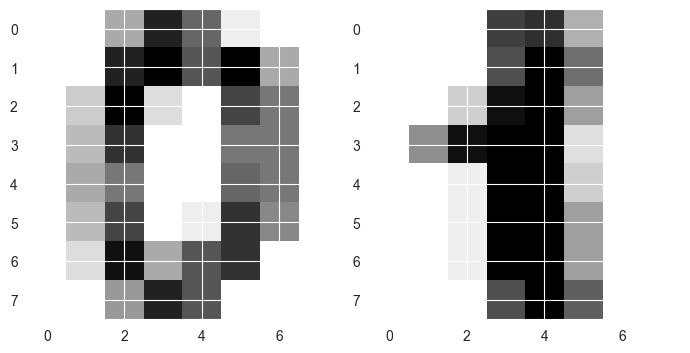

In [249]:
# TODO plt в цикле, subplots - должен быть вне цикла, выводим 3 картинки

fig, axes = plt.subplots(1, 2, figsize=(7, 7))
for n, img in enumerate(imgs[:2]):
    print(img)
    axes[n].imshow(img, cmap=plt.cm.binary)

plt.tight_layout()
plt.show()

**Вывод заданного числа картинок** 

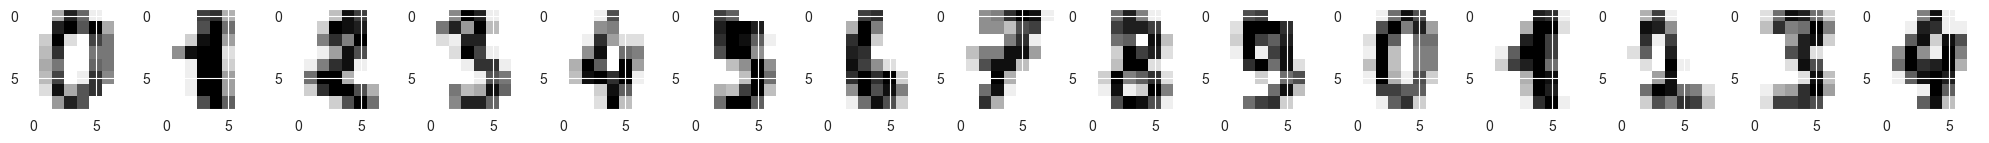

In [230]:
m = 15
fig, axes = plt.subplots(1, m, figsize=(20, 20))
for k, img in enumerate(imgs[:m]):
    axes[k].imshow(img, cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

**Вывод из load_digits нескольких изображений заданной цифр**

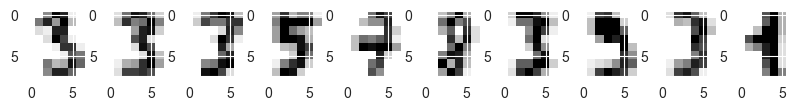

In [223]:
num_image = 100  # Число объектов из которых извлечём изображения чисел
ln = 10 # Длина разбиения объектов датасета от 0 до 9
idx = 3  # Число которое выводим, по факту Индекс Значения из разбитых на отрезки объектов
val = imgs[:num_image]  #  Часть data для отображения
subplt = int(len(val) / ln)  # Число выводимых картинок, количество столбцов в subplots
fig, axes = plt.subplots(1, subplt, figsize=(10, 10))
for n in range(0, len(val), ln):
    ax = int(n / ln)
    imgs_part = imgs[:num_image][n: n + ln][idx]
    axes[ax].imshow(imgs_part, cmap=plt.cm.binary)

plt.show()

**fit & predict**
* X_train и X_test по 0,5 так как мало данных
* Что бы оценить качество берём по больше для X_test

In [233]:
# TODO fit & predict

# data = datasets.load_digits()

X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
data['target']
y_train.shape



(898,)